In [2]:
import pandas as pd
from cloudmesh.common.Shell import Shell
from cloudmesh.common.util import readfile
import os
from io import StringIO

In [3]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
filename = ".o  benchmarks/gregor-5090X-RTX3090.log"


In [8]:
os.system(f"ls {filename}")

1

In [9]:
lines = readfile(filename).splitlines()
content = Shell.find_lines_with(lines, what="csv")
content = "\n".join(content)

In [10]:
df = pd.DataFrame()

In [11]:
csv_stream = StringIO(content)
df = pd.read_csv(csv_stream, sep=",", header=0)

In [12]:
df = df.drop(columns=["# csv", "status", "uname.system", "platform.version"])
df

,timer,time,sum,start,tag,msg,uname.node,user
0,total-EOS-USD-2-0,2.720,2.720,2022-06-12 23:09:39,DOGE-USD,None,5090X-RTX3090,gregor
1,training-EOS-USD-2-0,2.303,2.303,2022-06-12 23:09:40,DOGE-USD,None,5090X-RTX3090,gregor
2,prediction-EOS-USD-2-0,0.191,0.191,2022-06-12 23:09:42,DOGE-USD,None,5090X-RTX3090,gregor
3,RMSE-EOS-USD-2-0,0.000,0.000,2022-06-12 23:09:42,DOGE-USD,1.3022665740837391,5090X-RTX3090,gregor
4,total-EOS-USD-2-1,1.491,1.491,2022-06-12 23:09:42,DOGE-USD,None,5090X-RTX3090,gregor
...,...,...,...,...,...,...,...,...
795,RMSE-DOGE-USD-225-3,0.000,0.000,2022-06-12 23:55:08,DOGE-USD,0.013700710930753857,5090X-RTX3090,gregor
796,total-DOGE-USD-225-4,22.495,22.495,2022-06-12 23:55:08,DOGE-USD,None,5090X-RTX3090,gregor
797,training-DOGE-USD-225-4,21.990,21.990,2022-06-12 23:55:08,DOGE-USD,None,5090X-RTX3090,gregor
798,prediction-DOGE-USD-225-4,0.229,0.229,2022-06-12 23:55:30,DOGE-USD,None,5090X-RTX3090,gregor


In [13]:
rmse = df.copy()
rmse = rmse[rmse['timer'].str.contains('RMSE')]
rmse[['rest', 'name', 'unit', 'epoch', 'i', ]] = rmse['timer'].str.rsplit('-', 4, expand=True)
rmse[['rest', 'epoch', 'i', ]] = rmse['timer'].str.rsplit('-', 2, expand=True)
rmse["rmse"] = rmse["msg"].astype("float")
rmse["epoch"] = rmse["epoch"].astype("int")
rmse = rmse.drop(columns=["time", "sum", "start", "rest", "msg", "unit", "tag"])
rmse

,timer,uname.node,user,name,epoch,i,rmse
3,RMSE-EOS-USD-2-0,5090X-RTX3090,gregor,EOS,2,0,1.302267
7,RMSE-EOS-USD-2-1,5090X-RTX3090,gregor,EOS,2,1,1.429720
11,RMSE-EOS-USD-2-2,5090X-RTX3090,gregor,EOS,2,2,1.391311
15,RMSE-EOS-USD-2-3,5090X-RTX3090,gregor,EOS,2,3,1.363798
19,RMSE-EOS-USD-2-4,5090X-RTX3090,gregor,EOS,2,4,1.126530
...,...,...,...,...,...,...,...
783,RMSE-DOGE-USD-225-0,5090X-RTX3090,gregor,DOGE,225,0,0.007687
787,RMSE-DOGE-USD-225-1,5090X-RTX3090,gregor,DOGE,225,1,0.012367
791,RMSE-DOGE-USD-225-2,5090X-RTX3090,gregor,DOGE,225,2,0.009004
795,RMSE-DOGE-USD-225-3,5090X-RTX3090,gregor,DOGE,225,3,0.013701


C:\Users\Sledgehammer\AppData\Local\Temp\ipykernel_26928\3731466541.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['normalized rmse'] = (dataframe['rmse'] - dataframe['rmse'].min()) / (dataframe['rmse'].max() - dataframe['rmse'].min())
C:\Users\Sledgehammer\AppData\Local\Temp\ipykernel_26928\3731466541.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['normalized rmse'] = (dataframe['rmse'] - dataframe['rmse'].min()) / (dataframe['rmse'].max() - dataframe['rmse'].min())
C:\Users

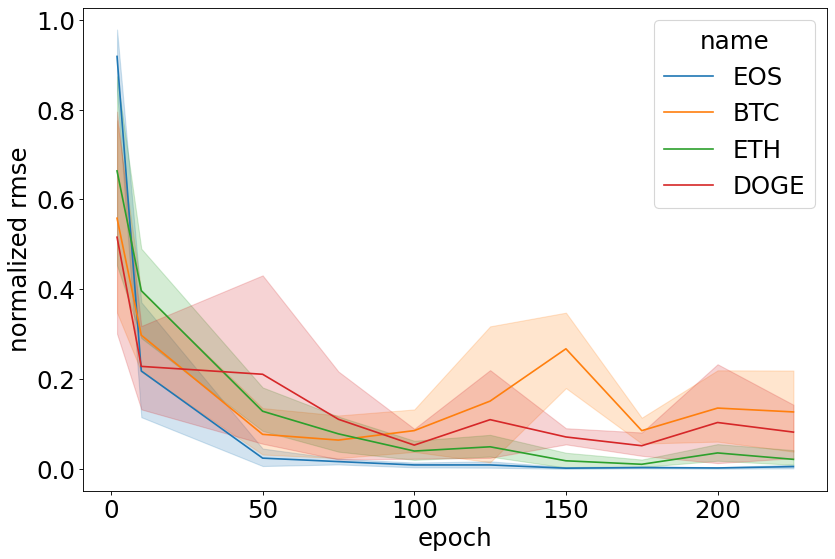

In [41]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
plt.rcParams.update({'font.size': 22})
list_of_cryptos = ["EOS", "BTC", "ETH", "DOGE"]

list_of_rmse = []
normalized_rmse = pd.DataFrame()
for crypto in list_of_cryptos:
    string_with_crypto = f"column_{crypto}"
    list_of_rmse.append(rmse.loc[rmse['name'] == crypto])

df_new = pd.DataFrame()
for dataframe in list_of_rmse:
    dataframe['normalized rmse'] = (dataframe['rmse'] - dataframe['rmse'].min()) / (dataframe['rmse'].max() - dataframe['rmse'].min())
df_new = pd.concat(list_of_rmse)

ax = sns.lineplot(data=df_new, x="epoch", y="normalized rmse", hue="name")
plt.show()

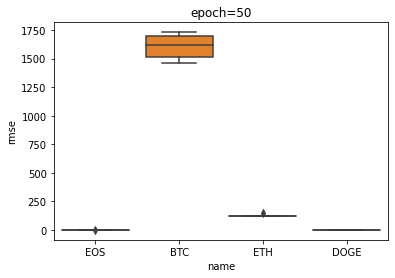

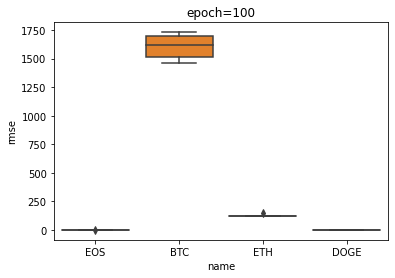

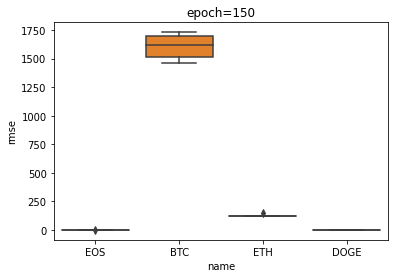

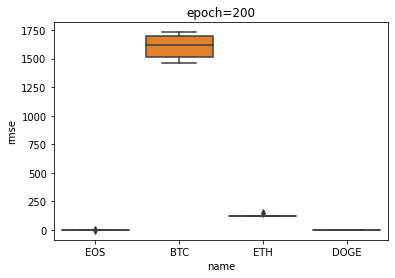

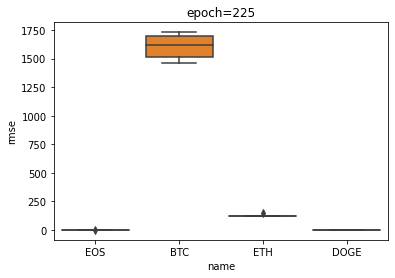

In [121]:
for e in [50, 100, 150, 200, 225]:
    epoch = rmse[rmse['epoch'].str.contains('175')]
    ax = sns.boxplot(x="name", y="rmse", data=epoch)
    ax.set_title(f"epoch={e}")
    plt.show()

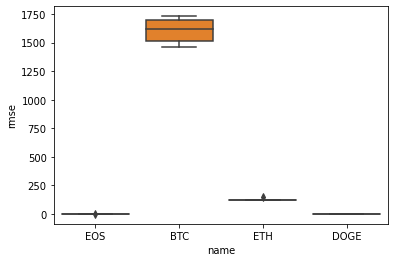